In [1]:
import pandas as pd
file = "D:/TalkBank/CLAN/output/"
age = ['48','54','60','66','72']
wordtype = ['adj', 'adv', 'cl', 'n', 'prep', 'v']
def word(filelist, a, w):
    data1 = pd.read_excel(filelist[0],sheet_name=1)
    key = ['File','Age','Sex',w+'_Types',w+'_Token',w+'_TTR']
    data2 = data1[key].copy()
    data3 = pd.read_excel(filelist[1],sheet_name=1)
    data4 = data3[key].copy()
    data = pd.concat([data2, data4])
    data.to_excel('E:/新桌面/result/'+w+'_'+a+'.xlsx', sheet_name= a)
def vocD(filelist, a):
    data1 = pd.read_excel(filelist[0],sheet_name=1)
    data2 = data1[['File','Age','Sex','FREQ_TTR','NDW_100','VOCD_D_optimum_average']].copy()
    data3 = pd.read_excel(filelist[1],sheet_name=1)
    data4 = data3[['File','Age','Sex','FREQ_TTR','NDW_100','VOCD_D_optimum_average']].copy()
    data = pd.concat([data2, data4])
    data.to_excel('E:/新桌面/result/vocD_'+a+'.xlsx', sheet_name= a)
def MLU(filelist,a):
    data1 = pd.read_excel(filelist[0])
    data2 = data1[['File','Age(Month)','Sex','MLU_Morphemes']].copy()
    data3 = pd.read_excel(filelist[1])
    data4 = data3[['File','Age(Month)','Sex','MLU_Morphemes']].copy()
    data = pd.concat([data2, data4])
    data5 = pd.read_excel(filelist[2])
    data6 = pd.read_excel(filelist[3])
    ls = data5.iloc[:,14].values.tolist()
    ls1 = data6.iloc[:,14].values.tolist()
    ls.extend(ls1)
    data['MLU5'] = ls
    data.to_excel('E:/新桌面/result/MLU_'+a+'.xlsx', sheet_name= a)
def chat(filelist,a):
    turn = []
    ccd = []
    cid = []
    age = []
    name = []
    sex = []
    for j in [0,3]:
        data1 = pd.read_excel(filelist[0+j])
        for i in range(len(data1['File'].values.tolist())):
            turn.append(data1.iloc[i, 12]/data1.iloc[i,13])
            age.append(data1.iloc[i,4])
            sex.append(data1.iloc[i,5])
            name.append(data1.iloc[i,0])
        data2 = pd.read_excel(filelist[1+j])
        for i in range(len(data2['File'].values.tolist())):
            ccd.append(data2.iloc[i, 12]/data2.iloc[i,13])
        data3 = pd.read_excel(filelist[2+j])
        for i in range(len(data3['File'].values.tolist())):
            cid.append(data3.iloc[i, 12]/data3.iloc[i,13])
    dic = {'File':name, 'Age':age, 'Sex':sex, 'Turn':turn, 'CCD':ccd, 'CID':cid}
    df = pd.DataFrame(dic)
    df.to_excel('E:/新桌面/result/chat'+'_'+a+'.xlsx', sheet_name= a)
def main():
    for i in range(5):
        filelist1 = [file+age[i]+'_ASD/word_'+age[i]+'_ASD.xls',file+age[i]+'_TD/word_'+age[i]+'_TD.xls']
        for j in range(6):
            word(filelist1, age[i], wordtype[j])
        vocD(filelist1, age[i])
        filelist2 = [file+age[i]+'_ASD/kideval.xls',file+age[i]+'_TD/kideval.xls',file+age[i]+'_ASD/mlu5.xls',file+age[i]+'_TD/mlu5.xls']
        MLU(filelist2,age[i])
        filelist3 = [file+age[i]+'_ASD/turn.xls',file+age[i]+'_ASD/ccd.xls',file+age[i]+'_ASD/cid.xls',file+age[i]+'_TD/turn.xls',\
                    file+age[i]+'_TD/ccd.xls',file+age[i]+'_TD/cid.xls',]
        chat(filelist3,age[i])
# main()

In [42]:
import pandas as pd
sheet=3
mode = 'L_ASD'
def num_to_string(num):
    numbers = {
        0 : "adj",
        1 : "adv",
        2 : "cl",
        3 : "n",
        4 : "prep",
        5 : "v"
    }
    return numbers.get(num, None)
name = num_to_string(sheet)
data = pd.read_excel("E:/新桌面/双学位/数据集/all_result.xlsx",sheet_name=sheet)
cat = []
token = []
ttr = []

for i in range(len(data['Name'].values.tolist())):
    if data.iloc[i,1] == mode:
        cat.append(data.iloc[i,4])
        token.append(data.iloc[i,5])
        ttr.append(data.iloc[i,6])
        
def ave_lasd(asd):
    new_asd = [0,0,0,0,0]
    new_asd[0] = asd[0]
    new_asd[1] = (asd[1]+asd[2])/2
    new_asd[2] = (asd[3]+asd[4])/2
    new_asd[3] = asd[5]
    new_asd[4] = 0
    return new_asd

def ave_hasd(asd):
    new_asd = [0,0,0,0,0]
    new_asd[0] = asd[0]
    new_asd[1] = sum(asd[1:4])/3
    new_asd[2] = sum(asd[4:9])/5
    new_asd[3] = sum(asd[9:13])/4
    new_asd[4] = asd[13]
    return new_asd

def ave_td(a):
    s = []
    for i in range(0,len(a),3):
        b=a[i:i+3]
        s.append(sum(b)/3)
    return s


def hasd(cat,token,ttr):
    new_cat = ave_hasd(cat)
    new_token = ave_hasd(token)
    new_ttr = ave_hasd(ttr)
    return new_cat,new_token,new_ttr

def lasd(cat,token,ttr):
    new_cat = ave_lasd(cat)
    new_token = ave_lasd(token)
    new_ttr = ave_lasd(ttr)
    return new_cat,new_token,new_ttr

def td(cat,token,ttr):
    new_cat = ave_td(cat)
    new_token = ave_td(token)
    new_ttr = ave_td(ttr)
    return new_cat,new_token,new_ttr

if mode == 'H_ASD':
    new_cat,new_token,new_ttr=hasd(cat,token,ttr)
elif mode == 'L_ASD':
    new_cat,new_token,new_ttr=lasd(cat,token,ttr)
else:
    new_cat,new_token,new_ttr=td(cat,token,ttr)

def save_to_xls(a,b,c):
    dic = {'Group':[mode]*5, name+'-type':a, name+'-token':b, name+'-TTR':c}
    df = pd.DataFrame(dic)
    df.to_excel("E:/新桌面/"+mode+'-'+name+".xlsx")
# save_to_xls(new_cat,new_token,new_ttr)
print(new_cat)
print(new_token)
print(new_ttr)

[39, 21.5, 7.5, 12, 0]
[69, 44.5, 13.5, 29, 0]
[0.565, 0.4205, 0.575, 0.414, 0]


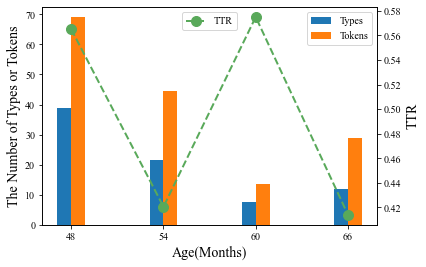

In [43]:
from matplotlib import pyplot as plt
import numpy as np

plt.rc('font',family='Times New Roman') 

bottom_x = ['48', '54', '60', '66', '72']
left_y1 = new_cat
left_y2 = new_token
right_y = new_ttr
if mode == "L_ASD":
    left_y1 = left_y1[:-1]
    left_y2 = left_y2[:-1]
    right_y = right_y[:-1]
    bottom_x=bottom_x[:-1]

fig, ax1 = plt.subplots()

x_indexes = np.arange(len(bottom_x))
width = 0.15
ax2 = ax1.twinx()

ax1.bar(x_indexes - 0.5 * width, left_y1, width=width, label='Types')
ax1.bar(x_indexes + 0.5 * width, left_y2, width=width, label='Tokens')
ax2.plot(bottom_x, right_y, linewidth=2, marker='o', color = '#59A95A',linestyle='--', markersize=10, label='TTR')

ax1.set_xlabel('Age(Months)', fontsize=14)
ax1.set_ylabel('The Number of Types or Tokens', fontsize=14)
ax2.set_ylabel('TTR', fontsize=14)

ax1.tick_params(axis='y')
ax2.tick_params(axis='y')

ax1.legend()
ax2.legend(loc='upper center')
plt.xticks(ticks=x_indexes, labels=bottom_x)
# plt.show()
plt.savefig("E:/新桌面/"+name+"_"+mode+".png",dpi=300,bbox_inches ='tight')

In [75]:
import pandas as pd
data = pd.read_excel("E:/新桌面/双学位/数据集/all_result.xlsx",sheet_name=5)
dic = {'ASD':[],'TD':[]}
for i in range(len(data['Name'].values.tolist())):
    dic[data.iloc[i,1]].append(data.iloc[i,6])
asd = list(dic['ASD'])
TD = list(dic['TD'])
new_asd = [0,0,0,0,0]
new_asd[0] = sum(asd[:2])/2
new_asd[1] = sum(asd[2:7])/5
new_asd[2] = sum(asd[7:14])/7
new_asd[3] = sum(asd[14:19])/5
new_asd[4] = asd[19]
def group(a):
    s = []
    for i in range(0,len(a),3):
        b=a[i:i+3]
        s.append(sum(b)/3)
    return s
new_TD = group(TD)

print(new_asd)
print(new_TD)

[0.4895, 0.39759999999999995, 0.3945714285714285, 0.4636, 0.345]
[0.48033333333333333, 0.621, 0.6496666666666666, 0.6073333333333334, 0.6433333333333333]


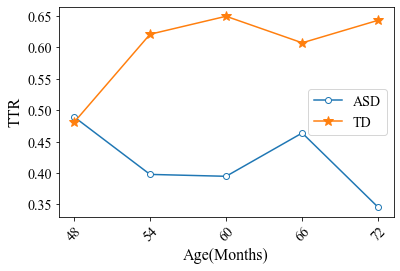

In [76]:
# encoding=utf-8
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman') 

mode = "v"

names = ['48', '54', '60', '66', '72']
x = range(len(names))
y = new_asd
y1= new_TD

plt.plot(x, y, marker='o',  mfc='w',label='ASD')
plt.plot(x, y1, marker='*', ms=10,label='TD')
plt.legend(fontsize=14)  # 让图例生效
plt.xticks(x, names, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.subplots_adjust(bottom=0.15)
plt.xlabel("Age(Months)",fontsize=16) #X轴标签
plt.ylabel("TTR",fontsize=16) #Y轴标签

# plt.show()
plt.savefig("E:/新桌面/"+mode+".png",dpi=300,bbox_inches ='tight')

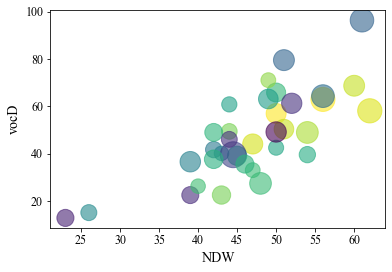

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_excel("E:/新桌面/双学位/数据集/all_result.xlsx",sheet_name=6)
ttr = data['TTR'].values.tolist()
ndw = data['NDW'].values.tolist()
vocd = data['vocD'].values.tolist()

# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

# 输入产量与温度数据
production = ttr
for i in range(len(production)):
    production[i] *= 1000
tem = ndw
rain = vocd

colors = np.random.rand(len(tem))  # 颜色数组
size = production
plt.scatter(tem, rain, s=size, c=colors, alpha=0.6)  # 画散点图, alpha=0.6 表示不透明度为 0.6

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('NDW',fontsize=14)  # 横坐标轴标题
plt.ylabel('vocD',fontsize=14)  # 纵坐标轴标题
# plt.show()
plt.savefig("E:/新桌面/versus-diversity.png",dpi=300,bbox_inches ='tight')

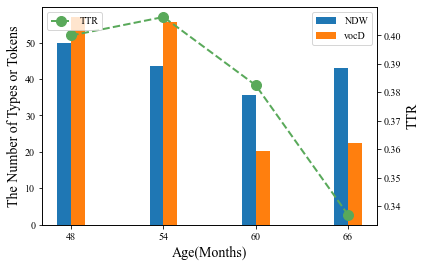

In [50]:
import pandas as pd
data = pd.read_excel("E:/新桌面/双学位/数据集/all_result.xlsx",sheet_name=6)

def ave_all_all(num):
    dic = {'ASD':[],'TD':[]}
    for i in range(len(data['Name'].values.tolist())):
        dic[data.iloc[i,1]].append(data.iloc[i,num])
    asd = list(dic['ASD'])
    td = list(dic['TD'])
    new_asd = [0,0,0,0,0]
    new_asd[0] = sum(asd[:2])/2
    new_asd[1] = sum(asd[2:7])/5
    new_asd[2] = sum(asd[7:14])/7
    new_asd[3] = sum(asd[14:19])/5
    new_asd[4] = asd[19]
    new_td = []
    for i in range(0,len(td),3):
        b=td[i:i+3]
        new_td.append(sum(b)/3)
    return new_asd, new_td
def ave_all(num):
    dic = {'H_ASD':[],'L_ASD':[],'TD':[]}
    for i in range(len(data['Name'].values.tolist())):
        dic[data.iloc[i,1]].append(data.iloc[i,num])
    hasd = list(dic['H_ASD'])
    lasd = list(dic['L_ASD'])
    lasd_new=[0,0,0,0]
    hasd_new=[0,0,0,0,0]
    lasd_new[0] = lasd[0]
    lasd_new[1] = (lasd[1]+lasd[2])/2
    lasd_new[2] = (lasd[3]+lasd[4])/2
    lasd_new[3] = lasd[5]
    hasd_new[0] = lasd[0]
    hasd_new[1] = sum(hasd[1:4])/3
    hasd_new[2] = sum(hasd[4:9])/5
    hasd_new[3] = sum(hasd[9:13])/4
    hasd_new[4] = hasd[13]
    return lasd_new, hasd_new
y1,y2=ave_all(4)
y3,y4=ave_all(5)
y5,y6=ave_all(6)
# names = ['48', '54', '60', '66', '72']
names=['48', '54', '60', '66']
x = range(len(names))

fig, ax1 = plt.subplots()

x_indexes = np.arange(len(names))
width = 0.15
ax2 = ax1.twinx()

ax1.bar(x_indexes - 0.5 * width, y3, width=width, label='NDW')
ax1.bar(x_indexes + 0.5 * width, y5, width=width, label='vocD')
ax2.plot(x, y1, linewidth=2, marker='o', color = '#59A95A',linestyle='--', markersize=10, label='TTR')

ax1.set_xlabel('Age(Months)', fontsize=14)
ax1.set_ylabel('The Number of Types or Tokens', fontsize=14)
ax2.set_ylabel('TTR', fontsize=14)

ax1.tick_params(axis='y')
ax2.tick_params(axis='y')

ax1.legend()
ax2.legend(loc='upper left')
plt.xticks(ticks=x_indexes, labels=names)
plt.savefig("E:/新桌面/diversity-lfa.png",dpi=300,bbox_inches ='tight')

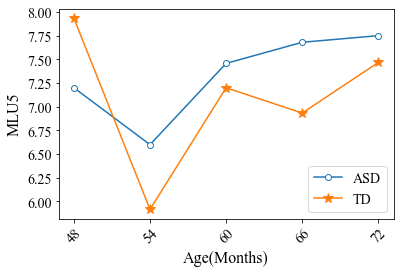

In [49]:
# encoding=utf-8
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman') 

mode = "mlu5"
data = pd.read_excel("E:/新桌面/双学位/数据集/all_result.xlsx",sheet_name=7)

def ave_all(num):
    dic = {'ASD':[],'TD':[]}
    for i in range(len(data['Name'].values.tolist())):
        dic[data.iloc[i,1]].append(data.iloc[i,num])
    asd = list(dic['ASD'])
    td = list(dic['TD'])
    new_asd = [0,0,0,0,0]
    new_asd[0] = sum(asd[:2])/2
    new_asd[1] = sum(asd[2:7])/5
    new_asd[2] = sum(asd[7:14])/7
    new_asd[3] = sum(asd[14:19])/5
    new_asd[4] = asd[19]
    new_td = []
    for i in range(0,len(td),3):
        b=td[i:i+3]
        new_td.append(sum(b)/3)
    return new_asd, new_td
mlua,mlut =ave_all(4)
mlu5a,mlu5t=ave_all(5)
names = ['48', '54', '60', '66', '72']
x = range(len(names))
y = mlua
y1= mlu5a
y2=mlut
y3=mlu5t

# plt.plot(x, y, marker='o',  mfc='w',label='ASD')
# plt.plot(x, y2, marker='*', ms=10,label='TD')
plt.plot(x, y1, marker='o',  mfc='w',label='ASD')
plt.plot(x, y3, marker='*', ms=10,label='TD')
plt.legend(fontsize=14)  # 让图例生效
plt.xticks(x, names, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.subplots_adjust(bottom=0.15)
plt.xlabel("Age(Months)",fontsize=16) #X轴标签
plt.ylabel("MLU5",fontsize=16) #Y轴标签

# plt.show()
plt.savefig("E:/新桌面/"+mode+".png",dpi=300,bbox_inches ='tight')

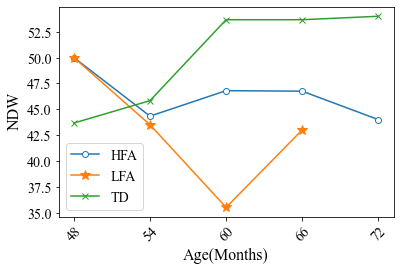

In [55]:
# encoding=utf-8
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('font',family='Times New Roman') 

mode = "versus-NDW"
data = pd.read_excel("E:/新桌面/双学位/数据集/all_result.xlsx",sheet_name=6)

def ave_all(num):
    dic = {'H_ASD':[],'L_ASD':[],'TD':[]}
    for i in range(len(data['Name'].values.tolist())):
        dic[data.iloc[i,1]].append(data.iloc[i,num])
    hasd = list(dic['H_ASD'])
    lasd = list(dic['L_ASD'])
    td = list(dic['TD'])
    lasd_new=[0,0,0,0]
    hasd_new=[0,0,0,0,0]
    new_td = []
    lasd_new[0] = lasd[0]
    lasd_new[1] = (lasd[1]+lasd[2])/2
    lasd_new[2] = (lasd[3]+lasd[4])/2
    lasd_new[3] = lasd[5]
    hasd_new[0] = lasd[0]
    hasd_new[1] = sum(hasd[1:4])/3
    hasd_new[2] = sum(hasd[4:9])/5
    hasd_new[3] = sum(hasd[9:13])/4
    hasd_new[4] = hasd[13]
    for i in range(0,len(td),3):
        b=td[i:i+3]
        new_td.append(sum(b)/3)
    return lasd_new, hasd_new,new_td
vocda,vocdt,vocdm =ave_all(5)

names = ['48', '54', '60', '66', '72']
x = range(len(names))
y1 = vocda
y= vocdt
y2 = vocdm

plt.plot(x, y, marker='o',  mfc='w',label='HFA')
plt.plot(x[:-1], y1, marker='*', ms=10,label='LFA')
plt.plot(x, y2, marker='x',  mfc='w',label='TD')

plt.legend(fontsize=14)  # 让图例生效
plt.xticks(x, names, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.subplots_adjust(bottom=0.15)
plt.xlabel("Age(Months)",fontsize=16) #X轴标签
plt.ylabel("NDW",fontsize=16) #Y轴标签

# plt.show()
plt.savefig("E:/新桌面/"+mode+".png",dpi=300,bbox_inches ='tight')

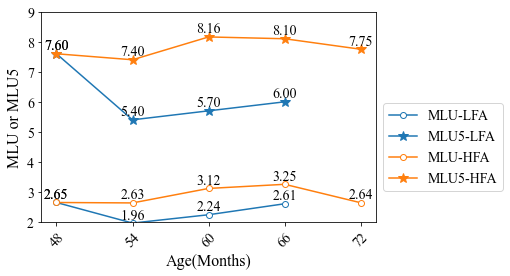

In [1]:
# encoding=utf-8
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('font',family='Times New Roman') 

mode = "MLU-MLU5-ASD"
data = pd.read_excel("E:/新桌面/双学位/数据集/all_result.xlsx",sheet_name=7)

def ave_all(num):
    dic = {'H_ASD':[],'L_ASD':[],'TD':[]}
    for i in range(len(data['Name'].values.tolist())):
        dic[data.iloc[i,1]].append(data.iloc[i,num])
    hasd = list(dic['H_ASD'])
    lasd = list(dic['L_ASD'])
    td = list(dic['TD'])
    lasd_new=[0,0,0,0]
    hasd_new=[0,0,0,0,0]
    new_td = []
    lasd_new[0] = lasd[0]
    lasd_new[1] = (lasd[1]+lasd[2])/2
    lasd_new[2] = (lasd[3]+lasd[4])/2
    lasd_new[3] = lasd[5]
    hasd_new[0] = lasd[0]
    hasd_new[1] = sum(hasd[1:4])/3
    hasd_new[2] = sum(hasd[4:9])/5
    hasd_new[3] = sum(hasd[9:13])/4
    hasd_new[4] = hasd[13]
    for i in range(0,len(td),3):
        b=td[i:i+3]
        new_td.append(sum(b)/3)
    return lasd_new, hasd_new,new_td
mlua,mlut,mlum =ave_all(4)
mlu5a,mlu5t,mlu5m=ave_all(5)
names = ['48', '54', '60', '66', '72']
x = range(len(names))
y = mlua
y1= mlu5a
y2=mlut
y3=mlu5t
y4=mlum
y5=mlu5m
plt.plot(x[:-1], y, marker='o',  mfc='w',c='#1f77b4',label='MLU-LFA')
plt.plot(x[:-1], y1, marker='*', ms=10,c='#1f77b4',label='MLU5-LFA')
plt.plot(x, y2, marker='o',  mfc='w',c='#ff7f0e',label='MLU-HFA')
plt.plot(x, y3, marker='*', ms=10,c='#ff7f0e',label='MLU5-HFA')
plt.legend(fontsize=14,bbox_to_anchor = (1, 0.6))  # 让图例生效
plt.xticks(x, names, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.subplots_adjust(bottom=0.15)
plt.xlabel("Age(Months)",fontsize=16) #X轴标签
plt.ylabel("MLU or MLU5",fontsize=16) #Y轴标签
plt.ylim(2,9)

for a,b in zip(x,y2):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=14)
for a,b in zip(x,y3):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=14)
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=14)
for a,b in zip(x,y1):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=14)
# plt.show()

plt.savefig("E:/新桌面/"+mode+".png",dpi=300,bbox_inches ='tight')

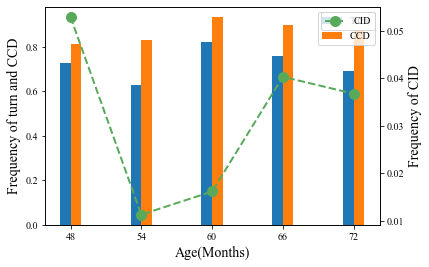

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel("E:/新桌面/双学位/数据集/all_result.xlsx",sheet_name=8)

def ave_all(num):
    dic = {'ASD':[],'TD':[]}
    for i in range(len(data['Name'].values.tolist())):
        dic[data.iloc[i,1]].append(data.iloc[i,num])
    asd = list(dic['ASD'])
    td = list(dic['TD'])
    new_asd = [0,0,0,0,0]
    new_asd[0] = sum(asd[:2])/2
    new_asd[1] = sum(asd[2:7])/5
    new_asd[2] = sum(asd[7:14])/7
    new_asd[3] = sum(asd[14:19])/5
    new_asd[4] = asd[19]
    new_td = []
    for i in range(0,len(td),3):
        b=td[i:i+3]
        new_td.append(sum(b)/3)
    return new_asd, new_td
y1,y2=ave_all(4)
y3,y4=ave_all(5)
y5,y6=ave_all(6)
names = ['48', '54', '60', '66', '72']
x = range(len(names))

plt.rc('font',family='Times New Roman') 
fig, ax1 = plt.subplots()

x_indexes = np.arange(len(x))
width = 0.15
ax2 = ax1.twinx()

ax1.bar(x_indexes - 0.5 * width, y2, width=width, label='Turn')
ax1.bar(x_indexes + 0.5 * width, y4, width=width, label='CCD')
ax2.plot(x, y6, linewidth=2, marker='o', color = '#59A95A',linestyle='--', markersize=10, label='CID')

ax1.set_xlabel('Age(Months)', fontsize=14)
ax1.set_ylabel('Frequency of turn and CCD', fontsize=14)
ax2.set_ylabel('Frequency of CID', fontsize=14)

ax1.tick_params(axis='y')
ax2.tick_params(axis='y')

ax1.legend()
ax2.legend()
plt.xticks(ticks=x_indexes, labels=names,fontsize=12) 
# plt.savefig("E:/新桌面/chat-td.png",dpi=300,bbox_inches ='tight')
dic = {'Age(Months)':names, 'Turn':y1,'CCD':y3,'CID':y5}
dic1 = {'Age(Months)':names, 'Turn':y2, 'CCD':y4, 'CID':y6}
df = pd.DataFrame(dic)
df1 = pd.DataFrame(dic1)
# df.to_excel("E:/新桌面/chat-asd.xlsx")
# df1.to_excel("E:/新桌面/chat-td.xlsx")

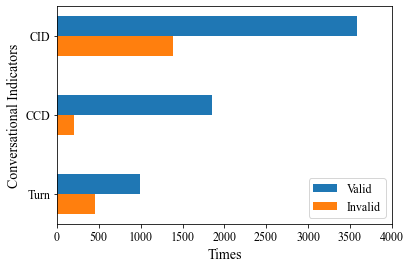

In [94]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font',family='Times New Roman')
# 构造x轴刻度标签、数据
labels = ['Turn', 'CCD', 'CID']
# first = [1888, 1941, 203]
first=[990, 1852, 3590]
# second = [1905, 1235, 49]
second=[449, 204, 1390]

# 两组数据
x = np.arange(len(labels))
width = 0.25 # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
plt.barh(x+width/2, width=first, height=width, left=0,label='Valid',tick_label=labels,align='center')
plt.barh(x-width/2, width=second, height=width,label='Invalid',tick_label=labels)
plt.xlabel('Times',fontsize=14)
plt.ylabel('Conversational Indicators',fontsize=14)

# x轴刻度标签位置不进行计算
plt.yticks(x, labels=labels,fontsize=12)
plt.legend()
plt.xlim(0, 4000)
plt.xticks(fontsize=12)


plt.legend(fontsize=12)

# plt.show()
plt.savefig("E:/新桌面/chat-td-new.png",dpi=300,bbox_inches ='tight')

In [2]:
import pandas as pd
file = "D:/TalkBank/CLAN/output/"
age = ['48','54','60','66','72']

def chat(filelist,a):
    turn1 = []
    turn2 = []
    ccd1 = []
    ccd2 = []
    cid1 = []
    cid2 = []
    age = []
    name = []
    sex = []
    for j in [0,3]:
        data1 = pd.read_excel(filelist[0+j])
        for i in range(len(data1['File'].values.tolist())):
            turn1.append(data1.iloc[i, 12])
            turn2.append(data1.iloc[i,13]-data1.iloc[i,12])
            age.append(data1.iloc[i,4])
            sex.append(data1.iloc[i,5])
            name.append(data1.iloc[i,0])
        data2 = pd.read_excel(filelist[1+j])
        for i in range(len(data2['File'].values.tolist())):
            ccd1.append(data2.iloc[i, 12])
            ccd2.append(data2.iloc[i,13]-data2.iloc[i,12])
        data3 = pd.read_excel(filelist[2+j])
        for i in range(len(data3['File'].values.tolist())):
            cid1.append(data3.iloc[i, 12])
            cid2.append(data3.iloc[i,13]-data3.iloc[i,12])
    dic = {'File':name, 'Age':age, 'Sex':sex, 'Turn1':turn1, 'Turn2':turn2, 'CCD1':ccd1, 'CCD2':ccd2, 'CID1':cid1,'CID2':cid2}
    df = pd.DataFrame(dic)
    df.to_excel('E:/新桌面/双学位/数据集/result/chat_new'+'_'+a+'.xlsx', sheet_name= a)
def main():
    for i in range(5):
        filelist3 = [file+age[i]+'_ASD/turn.xls',file+age[i]+'_ASD/ccd.xls',file+age[i]+'_ASD/cid.xls',file+age[i]+'_TD/turn.xls',\
                    file+age[i]+'_TD/ccd.xls',file+age[i]+'_TD/cid.xls',]
        chat(filelist3,age[i])
main()

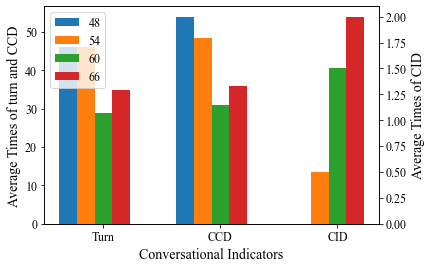

In [7]:
import numpy as np
import matplotlib.pyplot as plt
names=['Turn','CCD']
x = range(len(names))
plt.rc('font',family='Times New Roman') 
# turn = [87,117.3,106.6,97.3,142]
turn = [46,46,29,35]
# turn = [72,44,68.3,79.3,81.7]
# ccd = [36, 114.7, 100.6, 117.3, 176]
ccd = [54,48.5,31,36]
# ccd = [80.7,64.7,79.3,79.3,107.7]
# cid = [17, 12, 11.8, 6,16]
cid = [0,0.5,1.5,2]
# cid=[5,1.7,1.7,3.7,4.3]
fig, ax1 = plt.subplots()
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y0 = []
def sum_age(y,i,y0):
    y.append(turn[i])
    y.append(ccd[i])
    y0.append(cid[i])
    return y,y0

y1,y0 = sum_age(y1,0,y0)
y2,y0 = sum_age(y2,1,y0)
y3,y0 = sum_age(y3,2,y0)
y4,y0 = sum_age(y4,3,y0)
# y5,y0 = sum_age(y5,4,y0)
x_indexes = np.arange(len(x))
width = 0.15
ax2 = ax1.twinx()

ax1.bar(x_indexes - 2*width, y1, width=width, label='48')
ax1.bar(x_indexes - width, y2, width=width, label='54')
ax1.bar(x_indexes, y3, width=width, label='60')
ax1.bar(x_indexes + width, y4, width=width, label='66')
# ax1.bar(x_indexes + 2*width, y5, width=width, label='72')

ax2.bar(2 - 2*width, y0[0], width=width, label='48')
ax2.bar(2 - width, y0[1], width=width, label='54')
ax2.bar(2, y0[2], width=width, label='60')
ax2.bar(2 + width, y0[3], width=width, label='66')
# ax2.bar(2 + 2*width, y0[4], width=width, label='72')


ax1.set_xlabel('Conversational Indicators', fontsize=14)
ax1.set_ylabel('Average Times of turn and CCD', fontsize=14)
ax2.set_ylabel('Average Times of CID', fontsize=14)

ax1.tick_params(axis='y',labelsize=12)
ax2.tick_params(axis='y',labelsize=12)

ax1.legend(loc='upper left',fontsize=12)
ax1.set_xticks(ticks=[0,1,2])
ax1.set_xticklabels(['Turn','CCD','CID'],fontsize=12)
# plt.show()
plt.savefig("E:/新桌面/chat-LFA.png",dpi=300,bbox_inches ='tight')

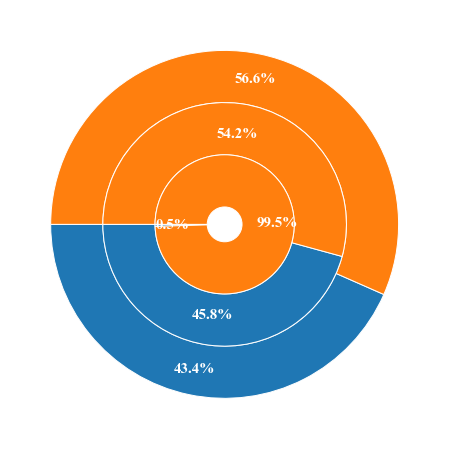

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

fig = [1,2,3,4]
group='lfa'
data = pd.read_excel("E:/新桌面/双学位/数据集/论文结果整理.xlsx",sheet_name=7)
valid = data['Valid'+'_'+group].values.tolist()
invalid = data['Invalid'+'_'+group].values.tolist()
num = data['Fig'].values.tolist()
plt.rc('font',family='Times New Roman') 
labels = ['Valid', 'Invalid']
colors = ['C0','C1']

for i in [1]:
    turn = []
    ccd = []
    cid = []
    for j in range(len(num)):
        if num[j] == fig[i]:
            turn.append(valid[j])
            turn.append(invalid[j])
            ccd.append(valid[j+1])
            ccd.append(invalid[j+1])
            cid.append(valid[j+2])
            cid.append(invalid[j+2])
            break
    plt.figure(figsize = (10, 8))
    wedges1, texts1, autotexts1 = plt.pie(turn,
        autopct = '%3.1f%%',
        radius = 1,
        pctdistance = 0.85,
        startangle = 180,
        colors=colors,
        textprops = {'color': 'w'},
        wedgeprops = {'width': 0.3, 'edgecolor': 'w'}
    )

    wedges2, texts2, autotexts2 = plt.pie(ccd,
        autopct = '%3.1f%%',
        radius = 0.7,
        pctdistance = 0.75,
        startangle = 180,
        textprops = {'color': 'w'},
        wedgeprops = {'width': 0.3, 'edgecolor': 'w'}
    )

    wedges3, texts3, autotexts3 = plt.pie(cid,
        autopct = '%3.1f%%',
        radius = 0.4,
        pctdistance = 0.75,
        startangle = 180,
        colors = colors,
        textprops = {'color': 'w'},
        wedgeprops = {'width': 0.3, 'edgecolor': 'w'}
    )

    '''plt.legend(wedges1,
              labels,
              fontsize = 20,
              bbox_to_anchor = (1, 0.6))'''

    plt.setp(autotexts1, size=15, weight='bold')
    plt.setp(autotexts2, size=15, weight='bold')
    plt.setp(autotexts3, size=15, weight='bold')
    plt.setp(texts1, size=15)

    # plt.show()
    plt.savefig("E:/新桌面/fig/chat-pie-"+group+'-'+str(fig[i])+".png",dpi=300,bbox_inches ='tight')

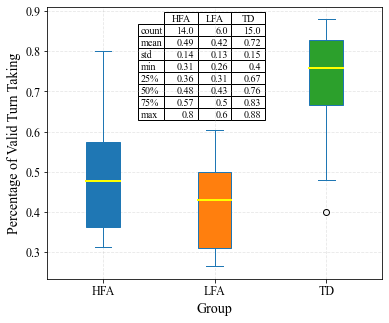

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
lfa = []
hfa = []
td = []
data = pd.read_excel("E:/新桌面/双学位/数据集/论文结果整理.xlsx",sheet_name=13)
group = data['Group'].values.tolist()
x = data['Turn'].values.tolist()
for i in range(len(group)):
    if group[i] == 'L_ASD':
        lfa.append(x[i])
    elif group[i] == 'TD':
        td.append(x[i])
    else:
        hfa.append(x[i])
for j in range(len(td)-len(hfa)):
    hfa.append(None)
for j in range(len(td)-len(lfa)):
    lfa.append(None)
data = {
    'HFA': hfa,
    'LFA': lfa,
    'TD': td
}
df = pd.DataFrame(data)
 
from pandas.plotting import table
 
fig, ax = plt.subplots(1, 1, figsize=(6,5))
bapad = plt.rcParams['legend.borderaxespad']
fontsize = plt.rcParams['font.size']
axline = plt.rcParams['axes.linewidth']  #need this, otherwise the result will be off by a few pixels
pad_points = bapad*fontsize + axline  #padding is defined in relative to font size
pad_inches = pad_points/72.0  #convert from points to inches
pad_pixels = pad_inches*fig.dpi  #convert from inches to pixels using the figure's dpi
# Define inverse transform, transforms display coordinates (pixels) to axes coordinates
inv = ax.transAxes.inverted()
# Inverse transform two points on the display and find the relative distance
pad_axes = inv.transform((pad_pixels, 0)) - inv.transform((0,0))  
pad_xaxis = pad_axes[0]

medianprops = dict(linestyle='-', linewidth=2, color='yellow')
table(ax, np.round(df.describe(), 2),
      loc = 'upper center',
      colWidths=[0.1, 0.1, 0.1],
      )
 
# df.plot.box(title="Consumer spending in each country", vert=False)
bplot = df.plot.box(
            ax=ax, return_type='dict',vert=True,  # vertical box alignment
                     patch_artist=True, medianprops = medianprops)
# fill with colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax.yaxis.grid(True)

plt.grid(linestyle="--", alpha=0.3)
plt.ylabel("Percentage of Valid Turn Taking",fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Group",fontsize=14)
# plt.show()
plt.savefig("E:/新桌面/Box-Mean value of Turn.png", dpi=300, bbox_inches ='tight')